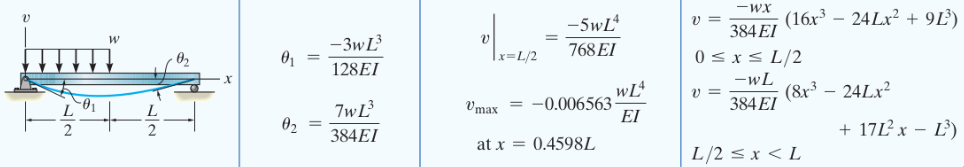

In [1]:
import sympy as sym

In [2]:
w, E, I, L, x = sym.symbols('w, E, I, L, x')

In [3]:
R2 = (w*(L/2)**2/2)/L
R1 = w*L/2 - R2

In [4]:
v1 = sym.Function('v_1')

In [5]:
M1 = R1*x - w*x**2/2

In [6]:
eq1 = sym.Eq(sym.diff(v1(x),(x,2)),M1/(E*I))
display(eq1)

Eq(Derivative(v_1(x), (x, 2)), (3*L*w*x/8 - w*x**2/2)/(E*I))

In [7]:
v2 = sym.Function('v_2')

In [8]:
M2 = R2*(L-x)  
#M2 = R1*x - w*L/2*(x-L/4)

In [9]:
eq2 = sym.Eq(sym.diff(v2(x),(x,2)),M2/(E*I))
display(eq2)

Eq(Derivative(v_2(x), (x, 2)), L*w*(L - x)/(8*E*I))

In [10]:
diff_eq_soln = sym.dsolve([eq1, eq2], [v1(x), v2(x)])
display(diff_eq_soln)

[Eq(v_1(x), C1 + C2*x + L*w*x**3/(16*E*I) - w*x**4/(24*E*I)),
 Eq(v_2(x), C3 + C4*x + L**2*w*x**2/(16*E*I) - L*w*x**3/(48*E*I))]

In [11]:
v1_soln = diff_eq_soln[0].rhs
v2_soln = diff_eq_soln[1].rhs

In [12]:
C1, C2, C3, C4 = sym.symbols('C1:5')

In [13]:
bc1_eq = sym.Eq(v1_soln.subs(x,0),0)

bc2_eq = sym.Eq(v1_soln.subs(x,L/2), v2_soln.subs(x,L/2))

bc3_eq = sym.Eq( sym.diff(v1_soln,x).subs(x,L/2), sym.diff(v2_soln,x).subs(x,L/2) )

bc4_eq = sym.Eq(v2_soln.subs(x,L),0)

display(bc1_eq, bc2_eq, bc3_eq, bc4_eq)

Eq(C1, 0)

Eq(C1 + C2*L/2 + L**4*w/(192*E*I), C3 + C4*L/2 + 5*L**4*w/(384*E*I))

Eq(C2 + 5*L**3*w/(192*E*I), C4 + 3*L**3*w/(64*E*I))

Eq(C3 + C4*L + L**4*w/(24*E*I), 0)

In [14]:
constants = sym.solve([bc1_eq, bc2_eq, bc3_eq, bc4_eq],[C1, C2, C3, C4])
display(constants)

{C1: 0,
 C2: -3*L**3*w/(128*E*I),
 C3: L**4*w/(384*E*I),
 C4: -17*L**3*w/(384*E*I)}

In [15]:
v1_soln_final = v1_soln.subs(constants).expand()

v2_soln_final = v2_soln.subs(constants).expand()

display(v1_soln_final.simplify(), v2_soln_final.simplify())

w*x*(-9*L**3 + 24*L*x**2 - 16*x**3)/(384*E*I)

L*w*(L**3 - 17*L**2*x + 24*L*x**2 - 8*x**3)/(384*E*I)